In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats 

In [2]:
df= pd.read_csv('Data.csv')
df.head()

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.shape

(306, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_year   306 non-null    int64
 2   Nb_pos_detected  306 non-null    int64
 3   Surv             306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
df.isnull().sum()

Age                0
Operation_year     0
Nb_pos_detected    0
Surv               0
dtype: int64

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


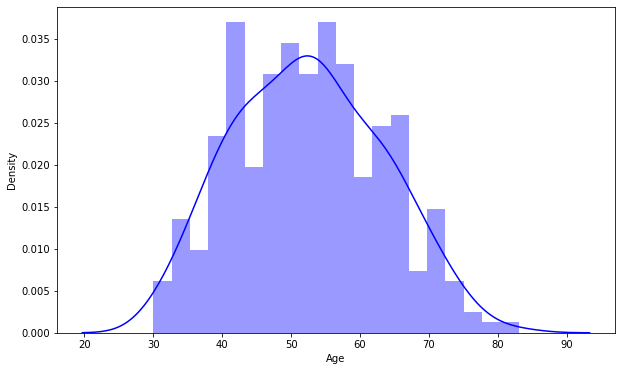

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df.Age,color="b",bins=20);

In [10]:
df['Surv'].describe()

count    306.000000
mean       1.264706
std        0.441899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Surv, dtype: float64

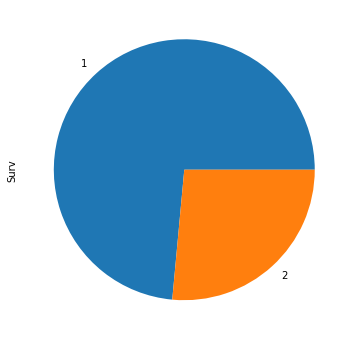

In [11]:
plt.figure(figsize=(10,6))
df['Surv'].value_counts().plot(kind='pie');

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


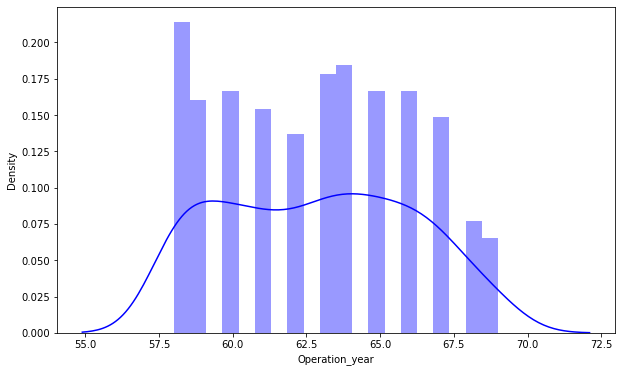

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df.Operation_year,color="b",bins=20);

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


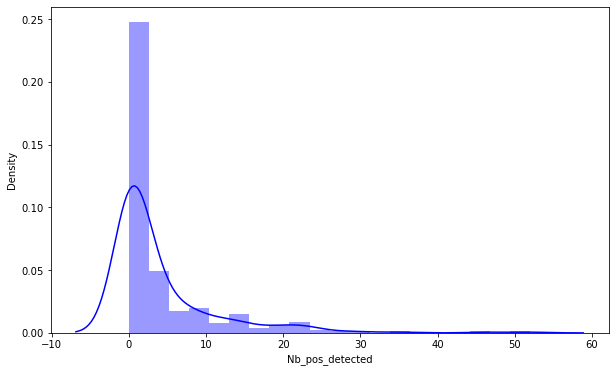

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df.Nb_pos_detected,color="b",bins=20);

In [4]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [5]:
df

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


<AxesSubplot:xlabel='timeline'>

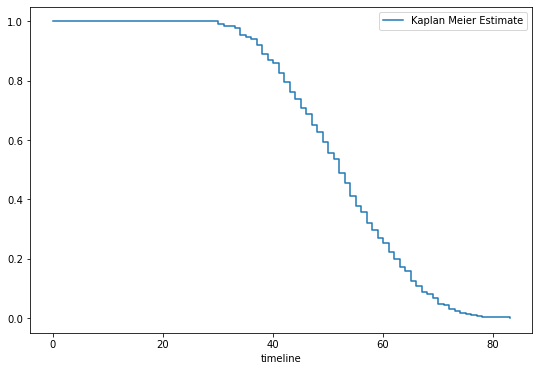

In [13]:
T = df.Age
E = df.Surv
plt.figure(figsize=(9,6))
## create a kmf object
km = KaplanMeierFitter() 

## Fit the data into the model
km.fit(T, E,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.

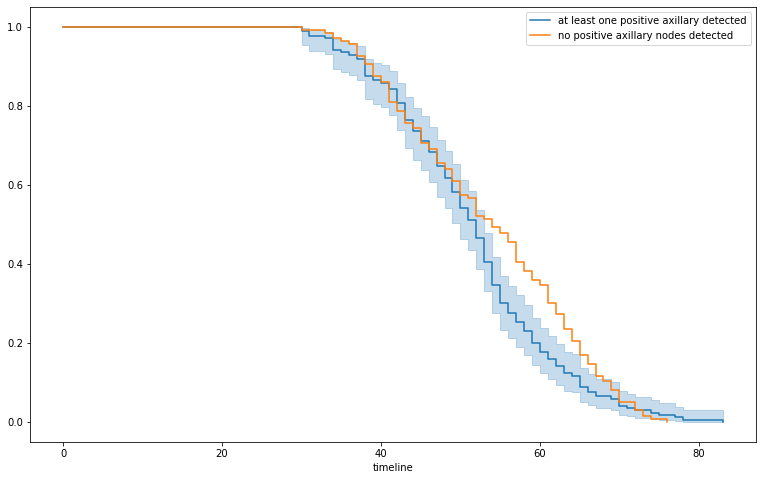

In [14]:
km_2 = KaplanMeierFitter()

## creating 2 cohorts : with at least one positive axillary detected, and one with no one detected
groups = df['Nb_pos_detected']   
i1 = (groups >= 1)   
i2 = (groups < 1)     

plt.figure(figsize=(13,8))
## fit the model for 1st cohort
km_2.fit(T[i1], E[i1], label='at least one positive axillary detected')

a1 = km_2.plot()

## fit the model for 2nd cohort
km_2.fit(T[i2], E[i2], label='no positive axillary nodes detected')
km_2.plot(ax=a1,ci_show=False);

In [74]:
from lifelines.statistics import logrank_test
results = logrank_test(T[i1], E[i2])

In [75]:
results.print_summary()
print(results.p_value) 
print(results.test_statistic) 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         346.37 <0.005    254.40

2.611435773513472e-77
346.37347065773764


In [76]:
df

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [10]:
df_Long_Survive = df.loc[df["Surv"] == 1];
df_Short_Survive = df.loc[df["Surv"]  == 2];

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


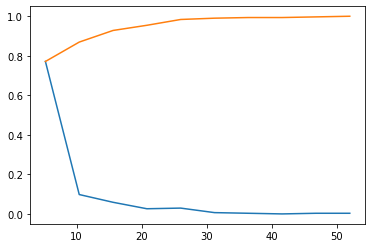

In [17]:
counts, bin_edges = np.histogram(df['Nb_pos_detected'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


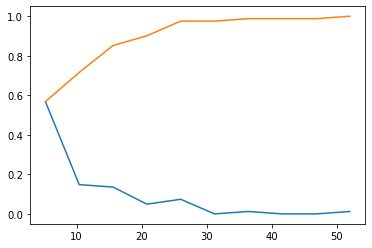

In [16]:
counts, bin_edges = np.histogram(df_Short_Survive['Nb_pos_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

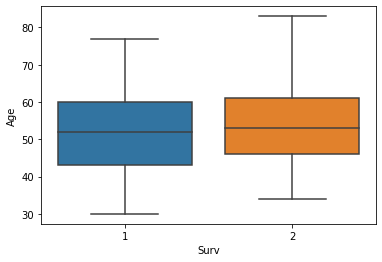

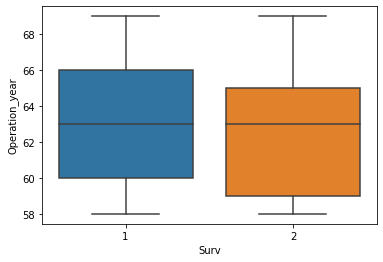

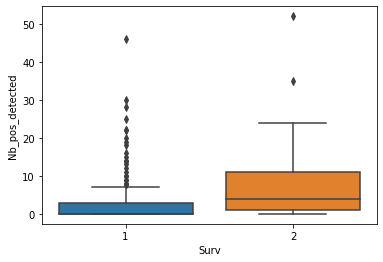

In [8]:
sns.boxplot(x='Surv',y='Age',data=df)


plt.show()
sns.boxplot(x='Surv',y='Operation_year',data=df)
plt.show()
sns.boxplot(x='Surv',y='Nb_pos_detected',data=df)
plt.show()

In [6]:
df

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
